In [ ]:
#Import all the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cancer_df = pd.read_csv("/content/drive/MyDrive/data.csv") #Getting the data 

In [ ]:
cancer_df.head() 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
cancer_df.columns #Columns info

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
cancer_df.describe() #Getting all the statistics of the dataset columns

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
cancer_df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True) #Dropping the "id" column as it's unnecessary
cancer_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
cancer_df.shape #Shape of the dataset

(569, 31)

In [ ]:
cancer_df.isnull().sum() #Checking for any Null values in every columns

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

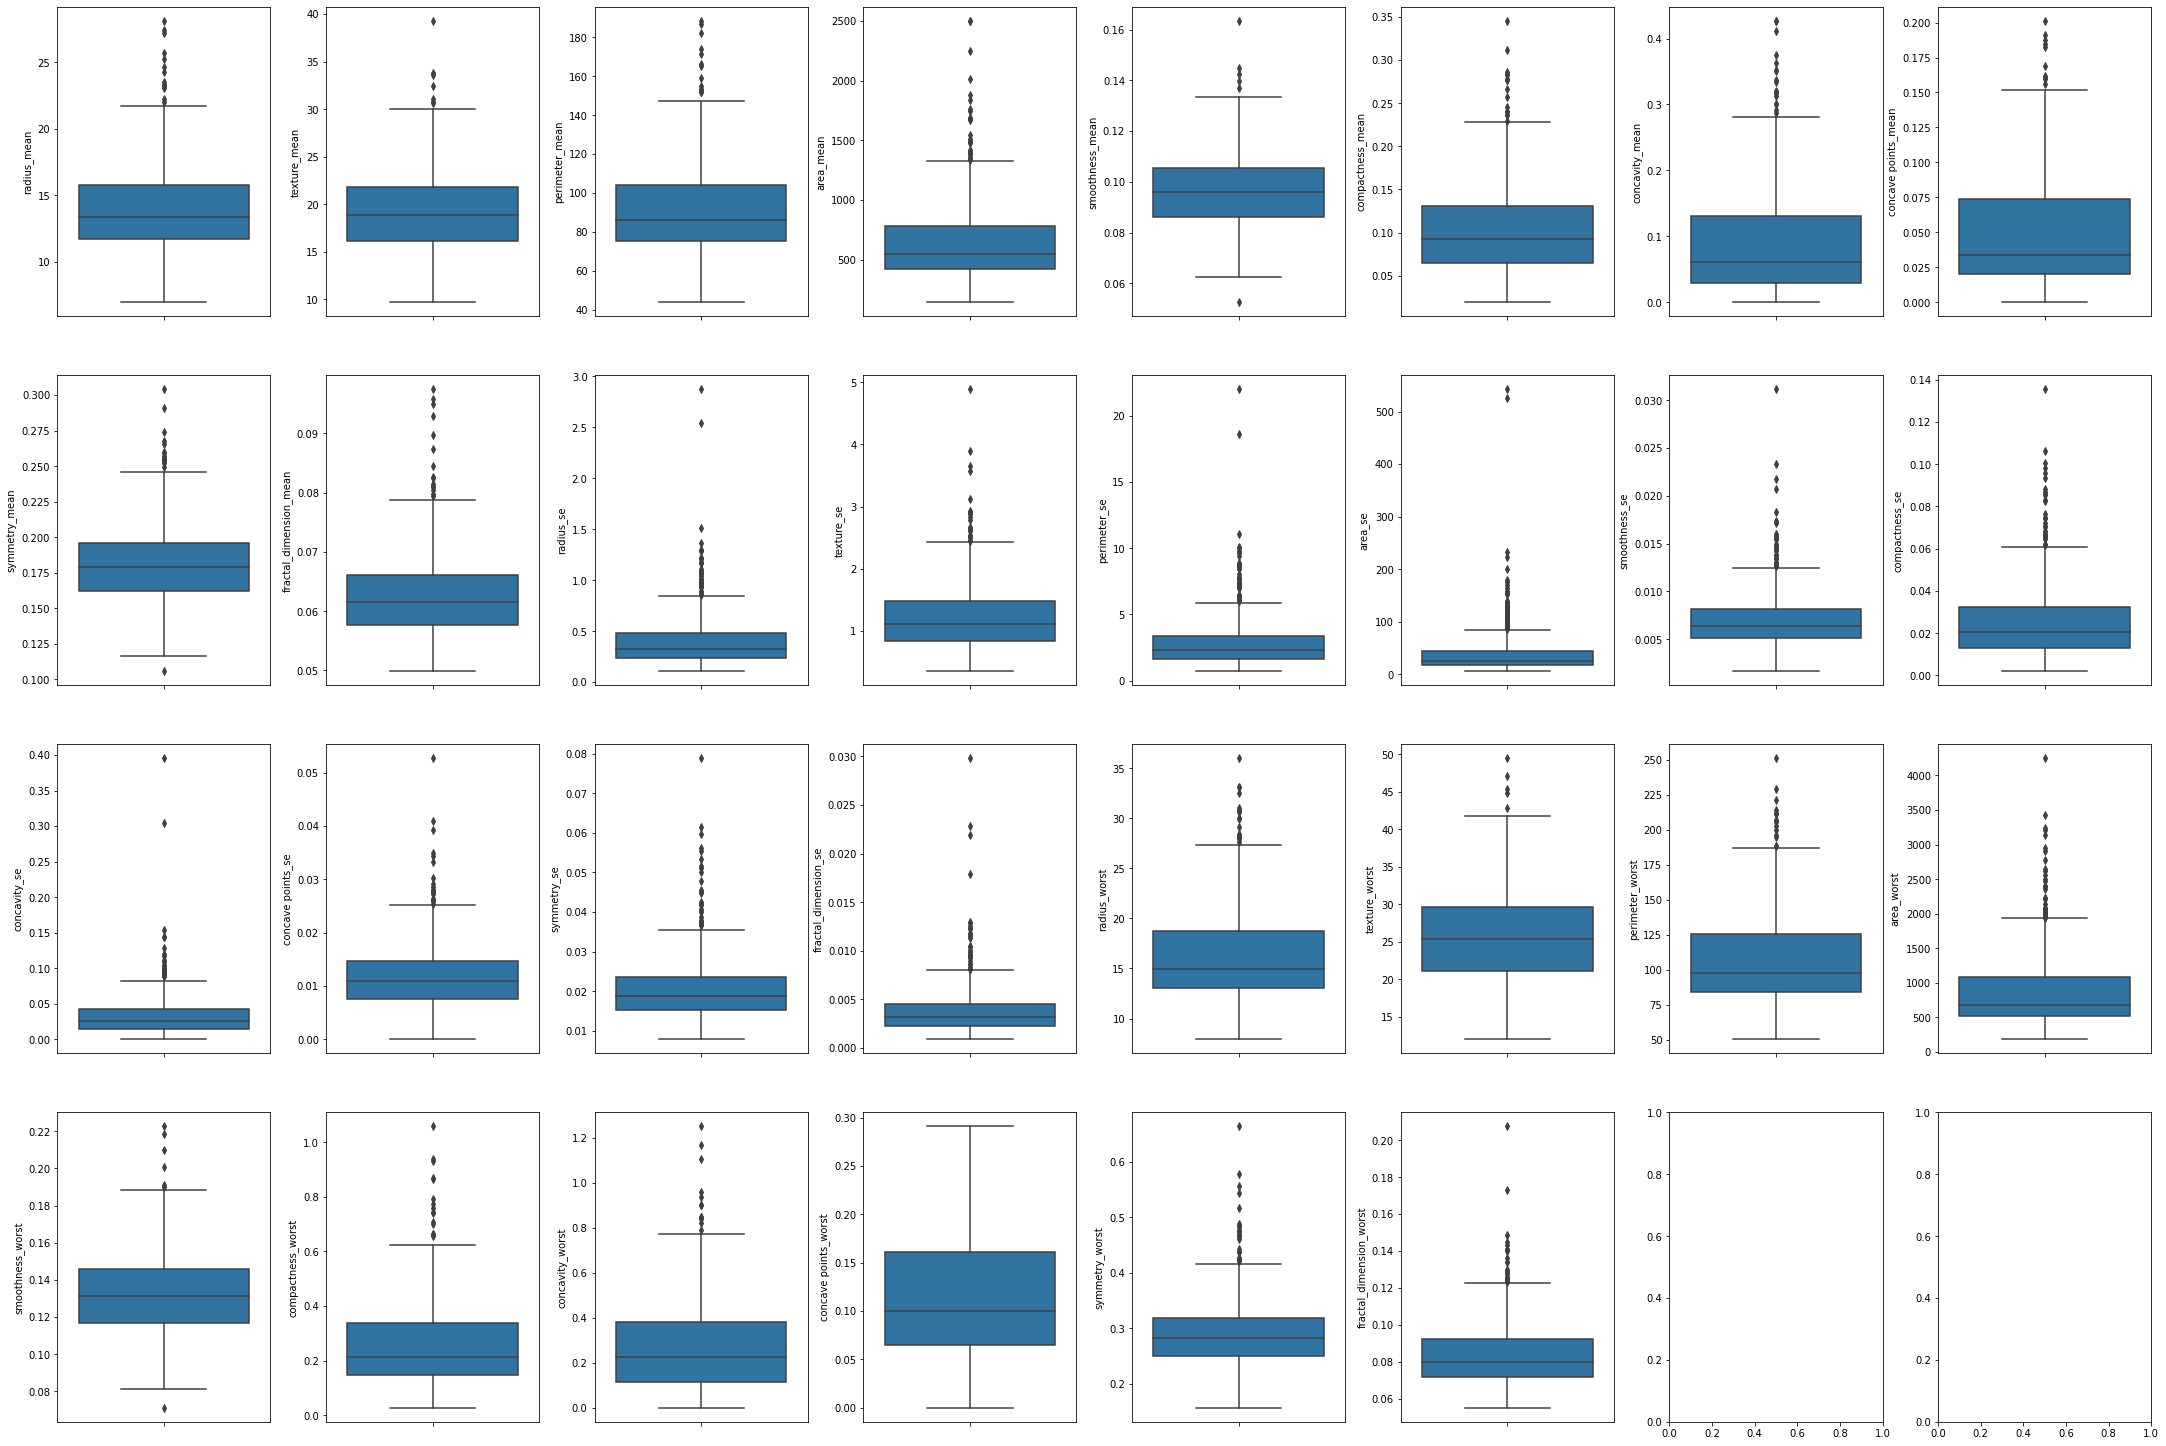

In [ ]:
#Visualization of the Outliers for all columns using Boxplot
cancer_df2 = cancer_df.drop("diagnosis", axis=1)
fig, axs = plt.subplots(ncols=8, nrows=4, figsize=(30,20))
index = 0
axs = axs.flatten()
for k, v in cancer_df2.items(): 
    sns.boxplot(y=k, data=cancer_df2, ax=axs[index]) 
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #Label Encoding of the Diagnosis Column 
diagnosis = le.fit_transform(cancer_df["diagnosis"])
cancer_df2['diagnosis'] = diagnosis
# 1 - Malignant
# 0 - Benign

In [ ]:
cancer_df2["diagnosis"].value_counts() #Checking for the value counts of the "diagnosis" column

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
#Getting Outliers Percentage for all columns 
for k, v in cancer_df2.items(): 
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1 #Inter-Quartile Range (IQR) Method
    v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(cancer_df2)[0]
    print(f"{k} Outliers = {round(perc, 2)}")

radius_mean Outliers = 2.46
texture_mean Outliers = 1.23
perimeter_mean Outliers = 2.28
area_mean Outliers = 4.39
smoothness_mean Outliers = 1.05
compactness_mean Outliers = 2.81
concavity_mean Outliers = 3.16
concave points_mean Outliers = 1.76
symmetry_mean Outliers = 2.64
fractal_dimension_mean Outliers = 2.64
radius_se Outliers = 6.68
texture_se Outliers = 3.51
perimeter_se Outliers = 6.68
area_se Outliers = 11.42
smoothness_se Outliers = 5.27
compactness_se Outliers = 4.92
concavity_se Outliers = 3.87
concave points_se Outliers = 3.34
symmetry_se Outliers = 4.75
fractal_dimension_se Outliers = 4.92
radius_worst Outliers = 2.99
texture_worst Outliers = 0.88
perimeter_worst Outliers = 2.64
area_worst Outliers = 6.15
smoothness_worst Outliers = 1.23
compactness_worst Outliers = 2.81
concavity_worst Outliers = 2.11
concave points_worst Outliers = 0.0
symmetry_worst Outliers = 4.04
fractal_dimension_worst Outliers = 4.22
diagnosis Outliers = 0.0


In [ ]:
#Removing the Highest Percentage Outliers ("area_se" column)
quantile1,quantile3= np.percentile(cancer_df2["area_se"],[25,75])
iqr=quantile3-quantile1
lower_bound=quantile1-(1.5*iqr)
upper_bound=quantile3+(1.5*iqr)
print(cancer_df2.shape) #Dataset shape before removing the Outliers
var1=np.where(cancer_df2['area_se'] >=upper_bound)
var2=np.where(cancer_df2['area_se'] <=lower_bound)
cancer_df2.drop(var1[0], inplace = True)
cancer_df2.drop(var2[0], inplace = True)
print(cancer_df2.shape) #Dataset shape after removing the Outliers

(569, 31)
(504, 31)


In [ ]:
X = cancer_df2.drop("diagnosis", axis=1) #Features
Y = cancer_df2["diagnosis"] #Labels

In [ ]:
#Splitting into Training and Testing Data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=53) 

In [ ]:
#Performing Chi-Square method
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,Y_train) #Returns two values : F-values abd P-values
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

radius_mean                 2.538416e-22
texture_mean                4.484468e-14
perimeter_mean             3.498056e-159
area_mean                   0.000000e+00
smoothness_mean             7.651681e-01
compactness_mean            1.038647e-01
concavity_mean              1.100565e-03
concave points_mean         2.213129e-02
symmetry_mean               7.257646e-01
fractal_dimension_mean      9.817880e-01
radius_se                   1.377677e-02
texture_se                  6.607388e-01
perimeter_se                5.467512e-11
area_se                     0.000000e+00
smoothness_se               9.632366e-01
compactness_se              5.872013e-01
concavity_se                4.436388e-01
concave points_se           7.165312e-01
symmetry_se                 9.341510e-01
fractal_dimension_se        9.540190e-01
radius_worst                1.347606e-40
texture_worst               5.090727e-29
perimeter_worst            4.657569e-291
area_worst                  0.000000e+00
smoothness_worst

# **Logistic Regression**

In [ ]:
model_1 = LogisticRegression(max_iter=10000) #Logistic Regression Model
model_1.fit(X_train,Y_train) #Fitting the Training Data into the model
test_prediction = model_1.predict(X_test) #Predicting the Test data 
accuracy = accuracy_score(Y_test, test_prediction) #Finding out the Test accuracy
print(f"Accuracy of the model(Logistic Regression) is : {round(accuracy*100, 2)} %")

Accuracy of the model(Logistic Regression) is : 97.03 %


In [ ]:
confusion_matrix(Y_test, test_prediction) #Confusion Matrix

array([[71,  1],
       [ 2, 27]])

In [ ]:
#Using K-Fold Cross Validation for Prediction Using Logistic Regression
mod_1 = LogisticRegression(max_iter=10000)
kfold_1 = KFold(n_splits=5, random_state=3, shuffle=True) #K-Fold Cross Validation
scores_1 = cross_val_score(mod_1, X, Y, cv=kfold_1)
print('Cross validation accuracies :',scores_1*100) #Accuracy for each split during K-Fold Cross Validation
print(f"Overall Accuracy by using KFold method is {round(scores_1.mean()*100, 2)} % (Logistic Regression)") #Mean of all the accuracy scores

Cross validation accuracies : [97.02970297 96.03960396 96.03960396 95.04950495 92.        ]
Overall Accuracy by using KFold method is 95.23 % (Logistic Regression)


#**K-Nearest Neighbours (KNN)**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Splitting into Training and Testing Data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=52)

In [ ]:
sc = StandardScaler() #Using Standard Scaler for Feature Scaling
x_train = sc.fit_transform(x_train) #Fit and Transform Training Data
x_test = sc.transform(x_test) #Transform Test Data

In [ ]:
from math import sqrt
sqrt(len(y_test)) #Finding out value of k

10.04987562112089

In [ ]:
model_2 = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean') #KNN Model
model_2.fit(x_train, y_train) #Fitting the Training Data into the model
y_predict = model_2.predict(x_test) #Predicting the Test data
accuracy_knn = accuracy_score(y_test, y_predict) #Finding out the Test accuracy
print(f"Accuracy of the model(KNN) is : {round(accuracy_knn*100, 2)} %")

Accuracy of the model(KNN) is : 96.04 %


In [ ]:
confusion_matrix(y_test, y_predict) #Confusion Matrix

array([[72,  0],
       [ 4, 25]])

In [ ]:
#Using K-Fold Cross Validation for Prediction Using KNN
mod_2 = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
kfold_2 = KFold(n_splits=5, random_state=53, shuffle=True) #K-Fold Cross Validation
scores_2 = cross_val_score(mod_2, X, Y, cv=kfold_2)
print('Cross validation accuracies :',scores_2*100) #Accuracy for each split during K-Fold Cross Validation
print(f"Overall Accuracy by using KFold method is {round(scores_2.mean()*100, 2)} % (KNN)") #Mean of all the accuracy scores

Cross validation accuracies : [90.0990099  86.13861386 96.03960396 94.05940594 95.        ]
Overall Accuracy by using KFold method is 92.27 % (KNN)


# **Support Vector Machine (SVM)**

In [ ]:
#Splitting into Training and Testing Data
X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, Y, test_size=0.2, random_state=51, stratify=Y)
X_tr = sc.fit_transform(X_tr) #Fit and Transform Training Data
X_ts = sc.transform(X_ts) #Transform Test Data

**SVM _Linear**

In [ ]:
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear') #SVM - Linear Model
svm_linear.fit(X_tr, Y_tr) #Fitting the Training Data into the model

SVC(kernel='linear')

In [ ]:
Y_predict = svm_linear.predict(X_ts) #Predicting the Test data
accuracy_svm_linear = accuracy_score(Y_ts, Y_predict) #Finding out the Test accuracy
print(f"Accuracy of the model(SVM - Linear) is : {round(accuracy_svm_linear*100, 2)} %")

Accuracy of the model(SVM - Linear) is : 95.05 %


In [ ]:
confusion_matrix(Y_ts, Y_predict) #Confusion Matrix

array([[72,  0],
       [ 5, 24]])

In [ ]:
#Using K-Fold Cross Validation for Prediction Using SVM - Linear
svm_l = SVC(kernel = 'linear')
kfold_3 = KFold(n_splits=5, random_state=51, shuffle=True) #K-Fold Cross Validation
scores_3 = cross_val_score(svm_l, X, Y, cv=kfold_3)
print('Cross validation accuracies :',scores_3*100) #Accuracy for each split during K-Fold Cross Validation
print(f"Overall Accuracy by using KFold method is {round(scores_3.mean()*100, 2)} % (SVM - Linear)") #Mean of all the accuracy scores

Cross validation accuracies : [95.04950495 93.06930693 97.02970297 97.02970297 95.        ]
Overall Accuracy by using KFold method is 95.44 % (SVM - Linear)


**SVM - Poly**

In [ ]:
svm_poly = SVC(kernel = 'poly') #SVM - Poly Model
svm_poly.fit(X_tr, Y_tr) #Fitting the Training Data into the model

SVC(kernel='poly')

In [ ]:
Y_predict_poly = svm_poly.predict(X_ts) #Predicting the Test data
accuracy_svm_poly = accuracy_score(Y_ts, Y_predict_poly) #Finding out the Test accuracy
print(f"Accuracy of the model(SVM - Poly) is : {round(accuracy_svm_poly*100, 2)} %")

Accuracy of the model(SVM - Poly) is : 89.11 %


In [ ]:
confusion_matrix(Y_ts, Y_predict_poly) #Confusion Matrix

array([[72,  0],
       [11, 18]])

In [ ]:
#Using K-Fold Cross Validation for Prediction Using SVM - Poly
svm_p = SVC(kernel = 'poly')
kfold_4 = KFold(n_splits=5, random_state=51, shuffle=True) #K-Fold Cross Validation
scores_4 = cross_val_score(svm_p, X, Y, cv=kfold_4)
print('Cross validation accuracies :',scores_4*100) #Accuracy for each split during K-Fold Cross Validation
print(f"Overall Accuracy by using KFold method is {round(scores_4.mean()*100, 2)} % (SVM - Poly)") #Mean of all the accuracy scores

Cross validation accuracies : [90.0990099  89.10891089 92.07920792 93.06930693 93.        ]
Overall Accuracy by using KFold method is 91.47 % (SVM - Poly)


**SVM - RBF**

In [ ]:
svm_rbf = SVC(kernel = 'rbf') #SVM - RBF Model
svm_rbf.fit(X_tr, Y_tr) #Fitting the Training Data into the model

SVC()

In [ ]:
Y_predict_rbf = svm_rbf.predict(X_ts) #Predicting the Test data
accuracy_svm_rbf = accuracy_score(Y_ts, Y_predict_rbf) #Finding out the Test accuracy
print(f"Accuracy of the model(SVM - RBF) is : {round(accuracy_svm_rbf*100, 2)} %")

Accuracy of the model(SVM - RBF) is : 96.04 %


In [ ]:
confusion_matrix(Y_ts, Y_predict_rbf) #Confusion Matrix

array([[72,  0],
       [ 4, 25]])

In [ ]:
#Using K-Fold Cross Validation for Prediction Using SVM - RBF
svm_r = SVC(kernel = 'rbf')
kfold_5 = KFold(n_splits=5, random_state=53, shuffle=True) #K-Fold Cross Validation
scores_5 = cross_val_score(svm_r, X, Y, cv=kfold_5)
print('Cross validation accuracies :',scores_5*100) #Accuracy for each split during K-Fold Cross Validation
print(f"Overall Accuracy by using KFold method is {round(scores_5.mean()*100, 2)} % (SVM - RBF)") #Mean of all the accuracy scores

Cross validation accuracies : [89.10891089 84.15841584 96.03960396 92.07920792 92.        ]
Overall Accuracy by using KFold method is 90.68 % (SVM - RBF)


# **Decision Tree**

In [ ]:
#Splitting into Training and Testing Data
x_tr, x_ts, y_tr, y_ts = train_test_split(X, Y, test_size=0.2, random_state=72, stratify=Y)
x_tr = sc.fit_transform(x_tr) #Fit and Transform Training Data
x_ts = sc.transform(x_ts) #Transform Test Data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d_t = DecisionTreeClassifier() #Decision Tree Model
d_t.fit(x_tr, y_tr) #Fitting the Training Data into the model

DecisionTreeClassifier()

In [ ]:
y_dt_predict = d_t.predict(x_ts) #Predicting the Test data
accuracy_dt = accuracy_score(y_ts, y_dt_predict) #Finding out the Test accuracy
print(f"Accuracy of the model(Decision Tree) is : {round(accuracy_dt*100, 2)} %")

Accuracy of the model(Decision Tree) is : 95.05 %


In [ ]:
confusion_matrix(y_ts, y_dt_predict) #Confusion Matrix

array([[68,  4],
       [ 1, 28]])

In [ ]:
#Using K-Fold Cross Validation for Prediction Using Decision Tree
model_dt = DecisionTreeClassifier()
kfold_6 = KFold(n_splits=5, random_state=53, shuffle=True) #K-Fold Cross Validation
scores_6 = cross_val_score(model_dt, X, Y, cv=kfold_6)
print('Cross validation accuracies :',scores_6*100) #Accuracy for each split during K-Fold Cross Validation
print(f"Overall Accuracy by using KFold method is {round(scores_6.mean()*100, 2)} % (Decision Tree)") #Mean of all the accuracy scores

Cross validation accuracies : [91.08910891 90.0990099  92.07920792 92.07920792 93.        ]
Overall Accuracy by using KFold method is 91.67 % (Decision Tree)


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 20)

In [ ]:
#Splitting into Training and Testing Data
x_t, X_ts, y_t, Y_ts = train_test_split(X, Y, test_size=0.2, random_state=72, stratify=Y)
x_t = sc.fit_transform(x_t) #Fit and Transform Training Data
X_ts = sc.transform(X_ts) #Transform Test Data

In [ ]:
random_forest.fit(x_t, y_t) #Fitting the Training Data into the model
y_random_predict = random_forest.predict(X_ts) #Predicting the Test data
accuracy_random = accuracy_score(Y_ts, y_random_predict) #Finding out the Test accuracy
print(f"Accuracy of the model(Random Forest) is : {round(accuracy_random*100, 2)} %")

Accuracy of the model(Random Forest) is : 98.02 %


In [ ]:
confusion_matrix(Y_ts, y_random_predict) #Confusion Matrix

array([[71,  1],
       [ 1, 28]])

In [ ]:
#Using K-Fold Cross Validation for Prediction Using Random Forest
model_random = RandomForestClassifier(n_estimators = 20)
kfold_7 = KFold(n_splits=5, random_state=72, shuffle=True) #K-Fold Cross Validation
scores_7 = cross_val_score(model_random, X, Y, cv=kfold_7)
print('Cross validation accuracies :',scores_7*100) #Accuracy for each split during K-Fold Cross Validation
print(f"Overall Accuracy by using KFold method is {round(scores_7.mean()*100, 2)} % (Random Forest)") #Mean of all the accuracy scores

Cross validation accuracies : [95.04950495 97.02970297 93.06930693 95.04950495 97.        ]
Overall Accuracy by using KFold method is 95.44 % (Random Forest)


# **Neural Network (TensorFlow Classification)**

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(),['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']), #Normalize the data
)

In [ ]:
# Transform training data 
ct.fit(X_train)
#Transform training and test data with normalization 
#(MinMaxScaler)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# Used to build and deploy machine learning apps
import tensorflow as tf
# Deep Learning API for creating Neural Networks (Runs on TensorFlow)
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow import math
from keras.utils.vis_utils import plot_model

In [ ]:
tf.random.set_seed(52) #Set Random Seed 
# Create a model
# Activation functions help our network decide what is important data.
# They receive data and add weightings to it and pass the results to other hidden layers
# Depending on the error value the weights are updated
model_1 = tf.keras.Sequential([
       tf.keras.layers.Dense(50, activation=tf.keras.activations.relu), #hidden layer, ReLU activation
       tf.keras.layers.Dense(50, activation=tf.keras.activations.relu), #hidden layer, ReLU activation
       tf.keras.layers.Dense(50, activation=tf.keras.activations.relu), #hidden layer, ReLU activation
       tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) #output layer, sigmoid activation                        
])
# Compile the model
# Compile the model (Calc errors, optimize and evaluate)
# Loss : Finds the average of the errors between predictions and 
# observed data (How incorrect are our predictions)
# Adam : Optimizes our guesses by smoothing the predictions 
# to the observed data 
# Metrics test the accuracy of the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])
# Fit the model
# Take the data and try to fit the data with 100 tries creating a trained model
# An epoch is a full iteration over the training data
history = model_1.fit(X_train_normal, Y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 0.6741 - accuracy: 0.6129
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 0.5947 - accuracy: 0.7122
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5014 - accuracy: 0.8065
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4002 - accuracy: 0.8784
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3122 - accuracy: 0.8958
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2460 - accuracy: 0.9156
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2032 - accuracy: 0.9132
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1795 - accuracy: 0.9280
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1621 - accuracy: 0.9380
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1376 - accuracy: 0.9404
Epoch 11/

In [ ]:
model_1.evaluate(X_train_normal, Y_train) #Evaluate Accuracy of the model based on Training Data

13/13 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 1.0000


[0.007930414751172066, 1.0]

Text(0.5, 1.0, 'Model 1 Loss Curve')

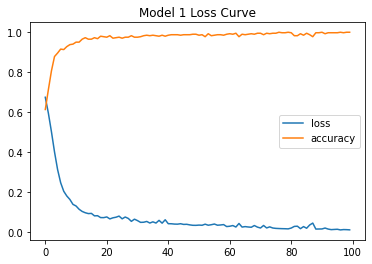

In [ ]:
pd.DataFrame(history.history).plot() #Plot Loss Curve
plt.title("Model 1 Loss Curve")

In [ ]:
# Create model to fit on the training data and test on testing data
tf.random.set_seed(52)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
optimizer="Adam",
metrics=["accuracy"])
# The callback works during model training
# At each epoch if we change the learning rate and the 
# schedular is going to give Adam the updated learning rate

# The learning rate starts at 1e-4 (.0001) and after each epoch 
# increase the learning rate 10^(epoch/20)
scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

history_lr = model_2.fit(X_train_normal, Y_train, epochs=100,
                              callbacks=[scheduler]) #Can have Multiple Callbacks

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 0.7062 - accuracy: 0.2928 - lr: 1.0000e-04
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.4467 - lr: 1.1220e-04
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6821 - accuracy: 0.6948 - lr: 1.2589e-04
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6679 - accuracy: 0.7270 - lr: 1.4125e-04
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6537 - accuracy: 0.7072 - lr: 1.5849e-04
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6375 - accuracy: 0.7072 - lr: 1.7783e-04
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6207 - accuracy: 0.7072 - lr: 1.9953e-04
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5994 - accuracy: 0.7072 - lr: 2.2387e-04
Epoch 9/100
13/13 [==============================] - 0s 6ms/step - loss:

Text(0.5, 1.0, 'Learning Rate vs. Loss')

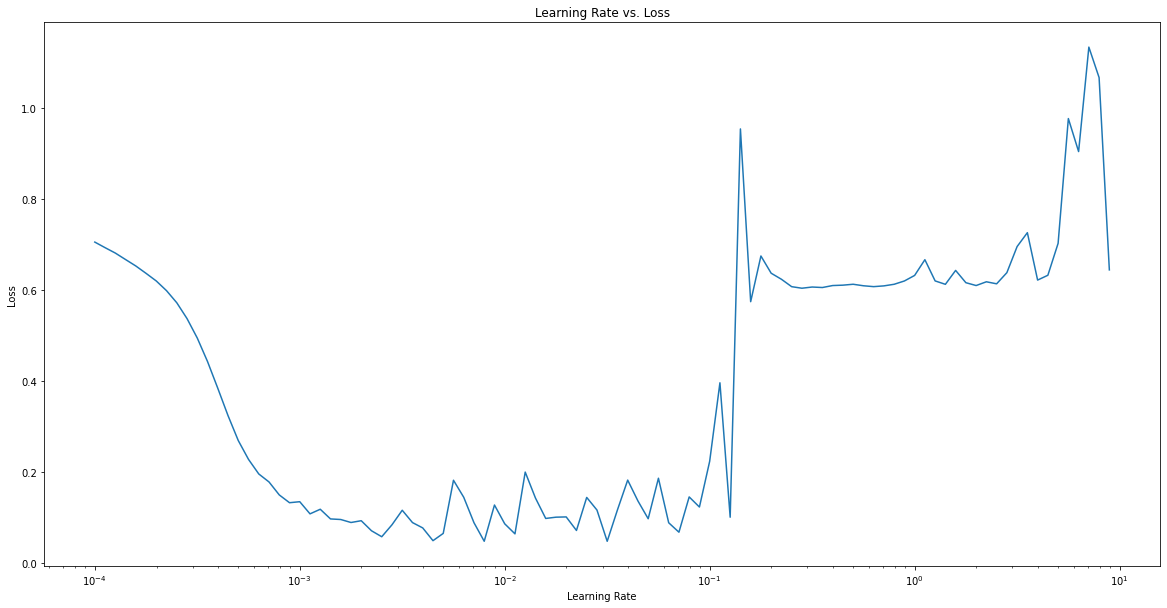

In [ ]:
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(20, 10))
plt.semilogx(lrs, history_lr.history['loss']) #Plotting Learning Rate vs. Loss 
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

In [ ]:
loss, accuracy = model_1.evaluate(X_test_normal, Y_test) #Evaluate with Test Data
print(f"Model Loss (Test Set) : {loss}")
print(f"Model Accuracy (Test Set) : {accuracy}")

4/4 [==============================] - 0s 4ms/step - loss: 0.1019 - accuracy: 0.9604
Model Loss (Test Set) : 0.10185491293668747
Model Accuracy (Test Set) : 0.9603960514068604


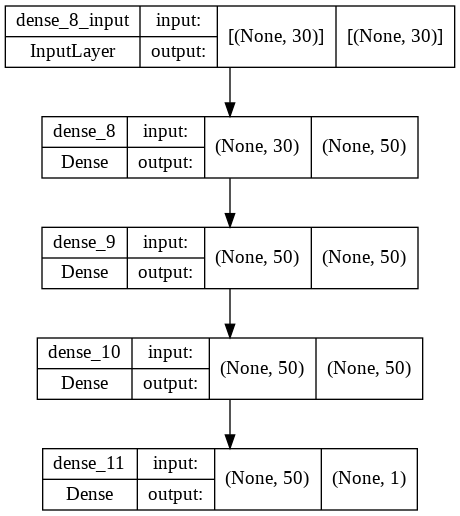

In [ ]:
#Each hidden layer tries to find pattern and then feeds to next layer
plot_model(model_1, show_shapes=True)

In [ ]:
#Get weights value and size
weights, biases = model_1.layers[1].get_weights()
weights, weights.shape

(array([[-0.09676112, -0.06939724,  0.16453923, ..., -0.16321947,
          0.261181  , -0.253979  ],
        [-0.10590221, -0.16870889, -0.09082835, ..., -0.16852225,
         -0.22038682, -0.05058858],
        [-0.23870754,  0.13239464,  0.2147727 , ...,  0.19492951,
          0.14825895, -0.2282805 ],
        ...,
        [-0.0196895 , -0.1979433 ,  0.00583763, ...,  0.15221193,
         -0.27977157,  0.27364683],
        [ 0.13790087,  0.2340552 ,  0.07694444, ...,  0.09951233,
          0.29051405, -0.13237779],
        [ 0.26922265,  0.01045666, -0.13821766, ...,  0.13970219,
          0.06321443, -0.10035826]], dtype=float32), (50, 50))